## Importing librararies

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [8]:
data = pd.read_csv("mail_data.csv")

In [9]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data = data.replace(np.nan, '', regex=True)

In [12]:
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
data.shape

(5572, 2)

## Data Preprocessing

<AxesSubplot:xlabel='Category', ylabel='count'>

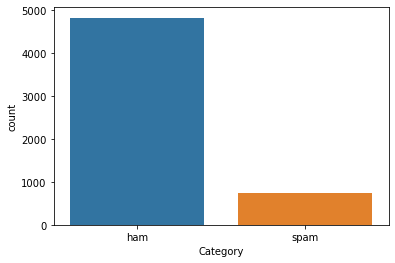

In [15]:
sns.countplot(x='Category',data=data)

#### Making Spam=0, Ham=1 to train the machine effieciently

In [ ]:
data.Category[data.Category=='spam']=0
data.Category[data.Category=='ham']=1


In [17]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
X = data['Message']
Y = data['Category']

In [19]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [20]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object

## ML

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4457,)
(1115,)
(4457,)
(1115,)


## Feature extraction for changig text to numerical values

In [49]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words = 'english', lowercase='True')

In [24]:
X_train_features = feature_extraction.fit_transform(x_train)

In [25]:
X_test_features = feature_extraction.transform(x_test)

In [26]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [27]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [28]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [29]:
print(X_test_features)

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train_features,y_train)

LogisticRegression()

## Predictions

In [32]:
pred = model.predict(X_train_features)
acc = accuracy_score(y_train,pred)

In [33]:
print(acc)

0.9670181736594121


In [34]:
pred_test = model.predict(X_test_features)
acc_test = accuracy_score(y_test,pred_test)

In [35]:
print(acc_test)

0.9659192825112107


In [36]:
input_mail = ["Free entry in 2 a wkly comp to win","Go until jurong point, crazy.."]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)


prediction = model.predict(input_data_features)
print(prediction)

for i in range(0,2):
    if (prediction[i]==1):
        print(input_mail[i]+' Ham mail ')
    else:
        print(input_mail[i]+' Spam mail ')


[0 1]
Free entry in 2 a wkly comp to win Spam mail 
Go until jurong point, crazy.. Ham mail 


In [38]:
predictions = pd.DataFrame()

predictions["Content"] = x_test

predictions["Real Category"] = y_test
predictions["Predicted Category"] = model.predict(X_test_features)

predictions.loc[predictions['Real Category'] == 0, 'Real Category'] = 'Ham'
predictions.loc[predictions['Real Category'] == 1, 'Real Category'] = 'Spam'

predictions.loc[predictions['Predicted Category'] == 0, 'Predicted Category'] = 'Ham'
predictions.loc[predictions['Predicted Category'] == 1, 'Predicted Category'] = 'Spam'

predictions.to_csv("test_prediction_result.csv", index=False)

predictions.head(10)

,Content,Real Category,Predicted Category
2632,"URGENT! Your mobile No 077xxx WON a £2,000 Bon...",Ham,Ham
454,Ok i will tell her to stay out. Yeah its been ...,Spam,Spam
983,Congrats! 2 mobile 3G Videophones R yours. cal...,Ham,Spam
1282,Am I the only one who doesn't stalk profiles?,Spam,Spam
4610,Y de asking like this.,Spam,Spam
4456,"Storming msg: Wen u lift d phne, u say ""HELLO""...",Spam,Spam
2611,"As usual..iam fine, happy &amp; doing well..:)",Spam,Spam
4914,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...",Ham,Spam
3948,"Sorry, went to bed early, nightnight",Spam,Spam
5299,Well good morning mr . Hows london treatin' ya...,Spam,Spam
